In [1]:
dir = '/home/arpan-john/Desktop/GC1/UNCERT_bn110102432/current/'
# import the TTE data class
from gbm.data import TTE

# read a tte file
tte1 = TTE.open(dir+'glg_tte_n0_bn110102432_v00.fit',)
tte2 = TTE.open(dir+'glg_tte_n3_bn110102432_v00.fit')
tte3 = TTE.open(dir+'glg_tte_n5_bn110102432_v00.fit')

tte_list = [tte1,tte2,tte3]

tte = TTE.merge(ttes = tte_list)

/home/arpan-john/anaconda3/envs/gbm/lib/python3.11/site-packages/gbm/plot/lal_post_subs.py:184: UserWarning: Basemap not installed. Some functionality not available.
  warnings.warn('Basemap not installed. Some functionality not available.')


In [7]:
# list the headers in the file
tte.headers.keys()

dict_keys(['PRIMARY', 'EBOUNDS', 'EVENTS', 'GTI'])

In [8]:
# print the metadata in the PRIMARY header
tte.headers['PRIMARY']

CREATOR = 'GBM Data Tools 1.1.1 Software and version creating file'             
FILETYPE= 'GBM PHOTON LIST'    / Name for this type of FITS file                
FILE-VER= '1.0.0   '           / Version of the format for this filetype        
TELESCOP= 'GLAST   '           / Name of mission/satellite                      
INSTRUME= 'GBM     '           / Specific instrument used for observation       
DETNAM  = 'NAI_00  '           / Individual detector name                       
OBSERVER= 'Meegan  '           / GLAST Burst Monitor P.I.                       
ORIGIN  = 'GIOC    '           / Name of organization making file               
DATE    = '2024-06-18T05:43:06' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
DATE-OBS= '2011-01-02T10:21:52' / Date of start of observation                  
DATE-END= '2011-01-02T10:27:23' / Date of end of observation                    
TIMESYS = 'TT      '           / Time system used in time keywords              
TIMEUNIT= 's       '        

In [9]:
# certain useful properties are easily accessible
print("GTI: {}".format(tte.gti))
print("Trigger time: {}".format(tte.trigtime))
print("Time Range: {}".format(tte.time_range))
print("Energy Range: {}".format(tte.energy_range))
print('# of Energy Channels: {}'.format(tte.numchans))

GTI: [(-30.656168043613434, 300.28405195474625)]
Trigger time: 315656545.511034
Time Range: (-30.656168043613434, 300.28405195474625)
Energy Range: (4.233729, 2000.0)
# of Energy Channels: 128


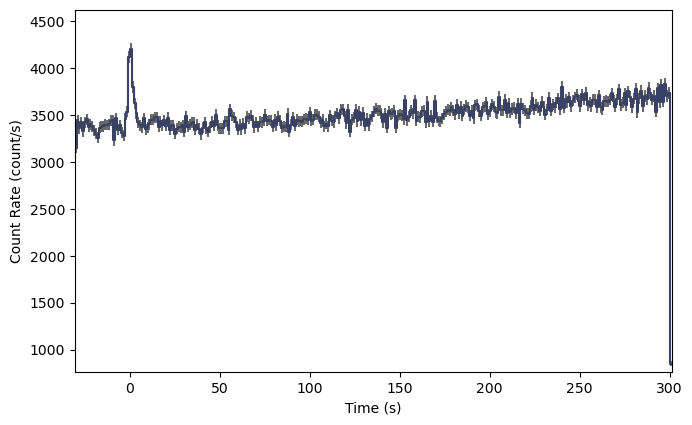

In [2]:
# import the bin_by_time algorithm for unbinned data
# This function is the unbinned equivalent of gbm.binning.binned.rebin_by_time
from gbm.binning.unbinned import bin_by_time

# time_ref is the reference time for binning;
# if not set, it will bin starting at the beginning of the data
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

%matplotlib inline
import matplotlib.pyplot as plt
from gbm.plot import Lightcurve

lcplot = Lightcurve(data=phaii.to_lightcurve())
plt.show()

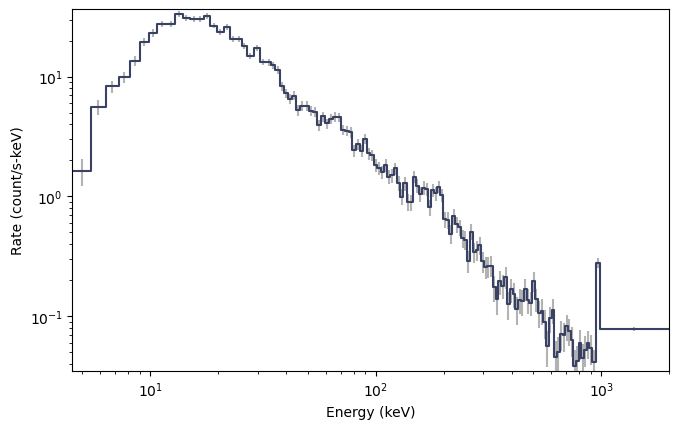

In [23]:
from gbm.plot import Spectrum

# integrate over time from 0-10 s
spectrum = tte.to_spectrum(time_range=(0.0, 10.0))

specplot = Spectrum(data=spectrum)
plt.show()

In [11]:
from gbm import test_data_dir
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time

# bin to 1.024 s resolution, reference time is trigger time
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

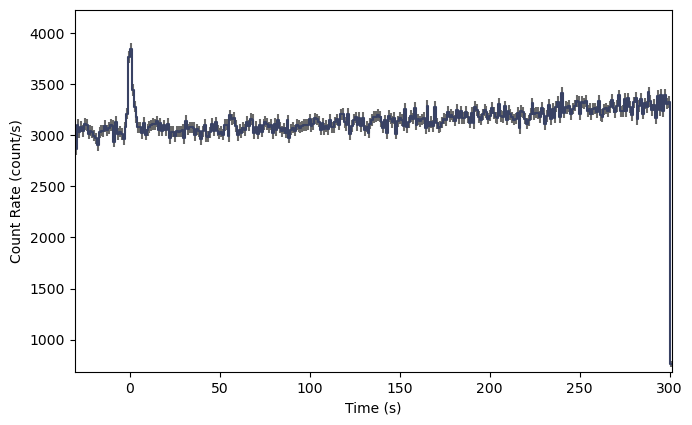

In [12]:
%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

erange = (8.0, 900.0)

lc_data = phaii.to_lightcurve(energy_range=erange)
lcplot = Lightcurve(data=lc_data)

In [61]:
# we want two background intervals, one before and one after the source.
# by eye, let's try:
bkgd_times = [(-30.0, -5.0), (75.0, 300.0)]

In [62]:
# the background fitter interface
from gbm.background import BackgroundFitter
# our fitting algorithm
from gbm.background.binned import Polynomial

# we initialize our background fitter with the phaii object, the algorithm, and the time ranges to fit.
# if we were using an unbinned algorithm, we'd call .from_tte() and give it tte instead of phaii
backfitter = BackgroundFitter.from_phaii(phaii, Polynomial, time_ranges=bkgd_times)

# and once initialized, we can run the fit with the fitting parameters appropriate for our algorithm.
# here, we'll do a 1st order polynomial
backfitter.fit(order=1)

In [63]:
backfitter.statistic/backfitter.dof

array([0.85990975, 0.9769401 , 1.1712947 , 1.10163131, 0.91164166,
       1.21384653, 0.87099517, 0.96430409, 0.92186323, 1.10561658,
       1.05333891, 0.97980339, 0.85169564, 0.96055554, 0.98355676,
       0.94370495, 1.19423985, 1.01286746, 0.8404988 , 1.01196387,
       0.96030482, 0.89897047, 1.09233365, 0.83963784, 1.16653796,
       1.09837092, 1.24033263, 0.99352121, 0.9951423 , 1.08741198,
       1.01805098, 0.95480394, 1.13370162, 0.94695132, 1.17471119,
       0.88536725, 1.07950608, 0.98701087, 0.98764555, 0.86840053,
       0.90401523, 1.03584319, 1.02462247, 0.90303557, 0.92556848,
       0.93568632, 1.06258255, 0.97071182, 0.93892621, 1.04155213,
       0.96128102, 0.80243388, 1.0354793 , 1.07266307, 0.96367092,
       1.19650725, 0.91027125, 0.84732056, 1.08565776, 1.01772903,
       0.91047461, 1.04090657, 1.19569583, 0.94783619, 1.09517099,
       1.14389748, 0.90400134, 0.96300539, 1.00086893, 1.19625269,
       0.995225  , 1.16389644, 0.9958328 , 1.07676167, 1.04256

In [64]:
backfitter.fit(order=2)
bkgd = backfitter.interpolate_bins(phaii.data.tstart, phaii.data.tstop)
type(bkgd)

gbm.background.background.BackgroundRates

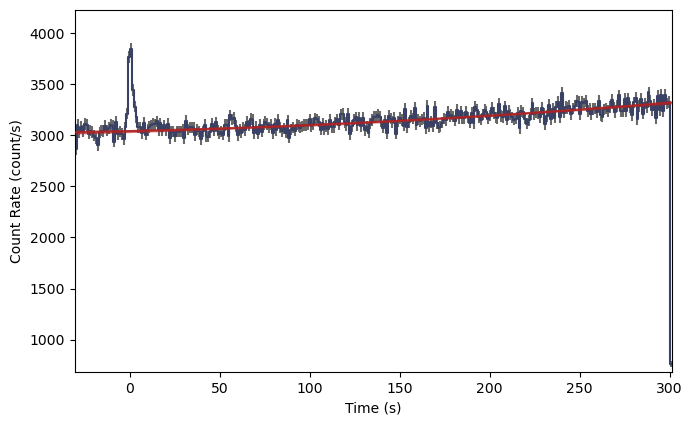

In [65]:
lc_bkgd = bkgd.integrate_energy(*erange)
lcplot = Lightcurve(data=lc_data, background=lc_bkgd)

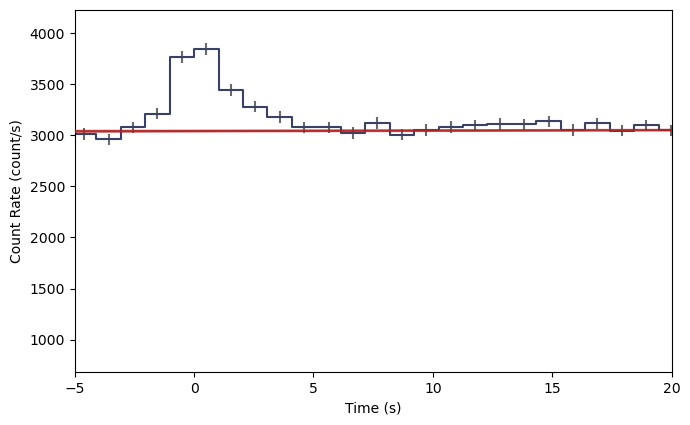

In [66]:
lcplot = Lightcurve(data=lc_data, background=lc_bkgd)
# zoom in to 5 seconds before to 20 s after the trigger time
view_range = (-5.0, 20.0)
lcplot.xlim = view_range


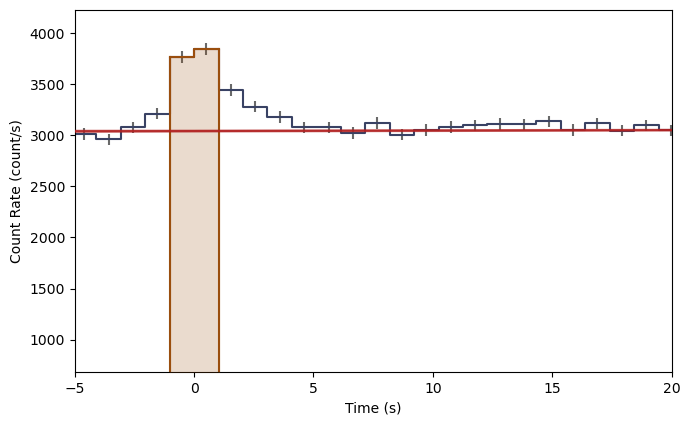

In [71]:
# our lightcurve source selection
src_time = (-1, 1)
src_lc = phaii.to_lightcurve(time_range=src_time, energy_range=erange)

lcplot = Lightcurve(data=lc_data, background=lc_bkgd)
lcplot.add_selection(src_lc)
lcplot.xlim = view_range

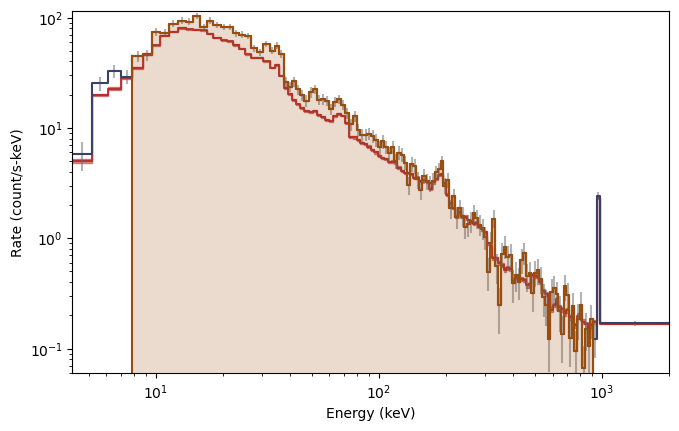

In [72]:
# the observed count spectrum during the source selection
spec_data = phaii.to_spectrum(time_range=src_time)
# the background model integrated over the source selection time
spec_bkgd = bkgd.integrate_time(*src_time)
# and the energy range selection that was made
spec_selection = phaii.to_spectrum(time_range=src_time, energy_range=erange)

specplot = Spectrum(data=spec_data, background=spec_bkgd)
specplot.add_selection(spec_selection)

In [13]:
dir = '/home/arpan-john/Desktop/GC2/UNCERT_bn170815526/current/'
# import the TTE data class
from gbm.data import TTE

# read a tte file
tte1 = TTE.open(dir+'glg_tte_n0_bn170815526_v00.fit')
tte2 = TTE.open(dir+'glg_tte_n6_bn170815526_v00.fit')
tte3 = TTE.open(dir+'glg_tte_n9_bn170815526_v00.fit')

tte_list = [tte1,tte2,tte3]

tte = TTE.merge(ttes = tte_list)

# import the bin_by_time algorithm for unbinned data
# This function is the unbinned equivalent of gbm.binning.binned.rebin_by_time
from gbm.binning.unbinned import bin_by_time

# time_ref is the reference time for binning;
# if not set, it will bin starting at the beginning of the data
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)

In [14]:
from gbm import test_data_dir
from gbm.data import Cspec, GbmDetectorCollection

# create a collection from the list of our files
cspecs = GbmDetectorCollection.from_list([phaii])

In [18]:
# define some time and energy ranges
view_range = (-5.0, 20.0)# zoom in to this time range
bkgd_range = [(-30.0, -5.0), (75.0, 300.0)] # the background fit ranges
src_range = (0, 2)    # our time selection
erange_nai = (8.0, 900.0) # in keV
erange_bgo = (325, 35000.0)

In [19]:
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial

# initialize the fitters and add to collection, making sure the collection knows which background
# goes with which detector
backfitters = [BackgroundFitter.from_phaii(cspec, Polynomial, time_ranges=bkgd_range) for cspec in cspecs]
backfitters = GbmDetectorCollection.from_list(backfitters, dets=cspecs.detector())

# do the fit
backfitters.fit(order=2)

# interpolate/extrapolate and store in a collection
bkgds = backfitters.interpolate_bins(cspecs.data()[0].tstart, cspecs.data()[0].tstop)
bkgds = GbmDetectorCollection.from_list(bkgds, dets=cspecs.detector())


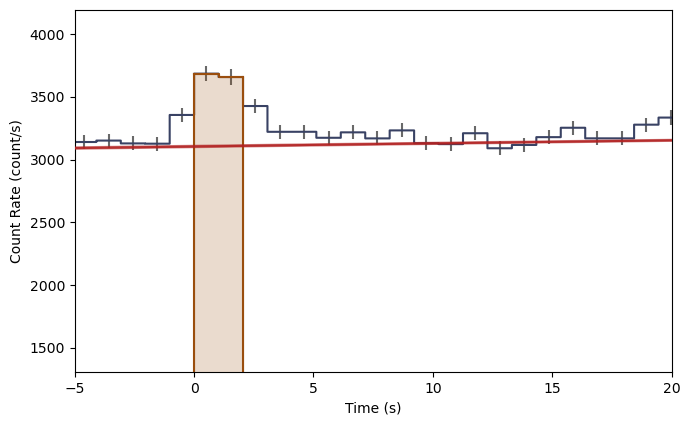

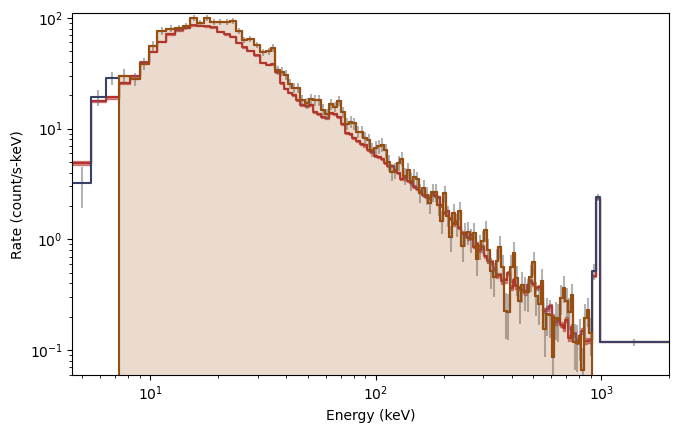

In [20]:
# the lightcurves
data_lcs = cspecs.to_lightcurve(nai_kwargs={'energy_range':erange_nai}, bgo_kwargs={'energy_range':erange_bgo})
# the energy-integrated background
bkgd_lcs = bkgds.integrate_energy(nai_args=erange_nai, bgo_args=erange_bgo)
# the source time selection
src_lcs = cspecs.to_lightcurve(time_range=src_range, nai_kwargs={'energy_range':erange_nai}, bgo_kwargs={'energy_range':erange_bgo})

# the count spectrum
data_specs = cspecs.to_spectrum(time_range=src_range)
# the time-integrated background
bkgd_specs = bkgds.integrate_time(*src_range)
# the energy selection
src_specs = cspecs.to_spectrum(time_range=src_range, nai_kwargs={'energy_range':erange_nai}, bgo_kwargs={'energy_range':erange_bgo})

%matplotlib inline
from gbm.plot import Lightcurve, Spectrum

# Plot the lightcurves with the selections and background fit
lcplots = [Lightcurve(data=data_lc, background=bkgd_lc) for data_lc, bkgd_lc in zip(data_lcs, bkgd_lcs)]
_ = [lcplot.add_selection(src_lc) for lcplot, src_lc in zip(lcplots, src_lcs)]
# zoom in
for lcplot in lcplots:
    lcplot.xlim = view_range

# Plot the spectra with the selections and background fit
specplots = [Spectrum(data=data_spec, background=bkgd_spec) for data_spec, bkgd_spec in zip(data_specs, bkgd_specs)]
_ = [specplot.add_selection(src_spec) for specplot, src_spec in zip(specplots, src_specs)]